## NLP - Lab 05/02/2025
### HOUGH TRANSFORM FROM SCRATCH

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from skimage.color import rgb2gray

In [2]:
# Function to display images

def display_image(image, title='Image', cmap=None):
    plt.figure(figsize=(10, 10))
    if cmap:
        plt.imshow(image, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [4]:
# Generate accumulator array
def hough_circle_accumulator(edges, radius):
    rows, cols = edges.shape
    accumulator = np.zeros((rows, cols), dtype=np.int32)

    # Get edge points
    edge_points = np.argwhere(edges)
    for x, y in edge_points:
        for theta in range(0, 360):
            angle = np.deg2rad(theta)
            a = int(x - radius * np.cos(angle))
            b = int(y - radius * np.sin(angle))
            if 0 <= a < rows and 0 <= b < cols:
                accumulator[a, b] += 1
    return accumulator

In [5]:
# Circle detection function
def detect_circles(image, min_radius, max_radius, threshold):
    edges = canny(image, sigma=1.5)
    detected_circles = []
    for radius in range(min_radius, max_radius + 1):
        accumulator = hough_circle_accumulator(edges, radius)
        centers = np.argwhere(accumulator > threshold)
        for center in centers:
            detected_circles.append((center[0], center[1], radius))
    
    return detected_circles

In [22]:
image_url = 'Coins.jpg'
image_path = 'Coins.jpg'
image = cv2.imread(image_url, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (300, 300))

# Run Hough Circle Detection
min_radius = 10
max_radius = 50
threshold = 150
circles = detect_circles(image, min_radius, max_radius, threshold)

# Display detected circles
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for x, y, r in circles:
    cv2.circle(output_image, (y, x), r, (0, 255, 0), 2)  # Correct order (x, y)
    cv2.circle(output_image, (y, x), 2, (0, 255, 0), 3)  # Mark center

display_image(output_image, "Hough Circle Detection")

KeyboardInterrupt: 

### Using library

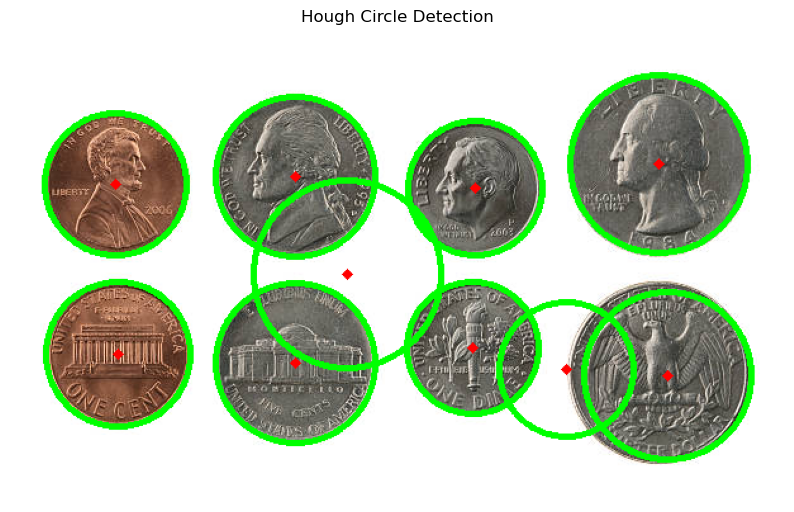

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display an image
def display_image(image, title='Image'):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
image_path = "Coins image.jpg"  # Use the correct image path
image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read as a colored image

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
gray_blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Detect circles using OpenCV's optimized HoughCircles
circles = cv2.HoughCircles(
    gray_blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50,
    param1=50, param2=30, minRadius=40, maxRadius=80
)

# Draw the detected circles
output_image = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))  # Convert to integers
    for x, y, r in circles[0, :]:
        cv2.circle(output_image, (x, y), r, (0, 255, 0), 3)  # Draw circle
        cv2.circle(output_image, (x, y), 2, (0, 0, 255), 3)  # Mark center

# Display the image with detected circles
display_image(output_image, "Hough Circle Detection")

### Parallel Circle Detection

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from concurrent.futures import ThreadPoolExecutor
from skimage.color import rgb2gray

In [7]:
# Function to display images

def display_image(image, title='Image', cmap=None):
    plt.figure(figsize=(10,10))
    if cmap:
        plt.imshow(image, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [8]:
# Generate accumulator array
def hough_circle_accumulator(edges, radius):
    rows, cols = edges.shape
    accumulator = np.zeros((rows, cols), dtype=np.int32)

    # Get edge points
    edge_points = np.argwhere(edges)
    for x, y in edge_points:
        for theta in range(0, 360):
            angle = np.deg2rad(theta)
            a = int(x - radius * np.cos(angle))
            b = int(y - radius * np.sin(angle))
            if 0 <= a < rows and 0 <= b < cols:
                accumulator[a, b] += 1
    return accumulator